In [ ]:
rule = [[3,], [ 0,1,4,5,6,7,8,]] #b... d...
b_r = rule[0]
d_r = rule[1]
tr_list = ['e0','e1','e2']
tr_list.extend(['b'+str(i) for i in b_r])
tr_list.extend(['d'+str(i) for i in d_r])
print(tr_list)

['e0', 'e1', 'e2', 'b3', 'd0', 'd1', 'd4', 'd5', 'd6', 'd7', 'd8']


In [ ]:
from random import shuffle, randint, choice, random, sample

def from_l_d_to_012(a, b):
    out = [2 for i in range(len(a))]
    for i in range(len(a)):
        if a[i] == 1:
            out[i] = 1
        if b[i] == 1:
            out[i] = 0
    return out

def from_012_to_l_d(s):
    live_c = [0 for i in range(n)]
    dead_c = [0 for i in range(n)]

    for i in range(len(s)):
        if s[i] == 1:
            live_c[i] = 1
        if s[i] == 0:
            dead_c[i] = 0
    return live_c, dead_c

n = 5

def get_near(t, n):
    if t == 0:
        return (n-1, 1)
    if t == n-1:
        return (n-2, 0)
    return (t-1, t+1)

def choose_transition(s, t,  tr = 2):
    k = random()
    if tr == 2:
        if k < 0.3:
            s[t] = 1
            return s, 1, 2
        if k < 0.6:
            s[t] = 0
            return s, 0, 2

        print('transition')

        n_of_0 = 0
        n_of_1 = 0
        n_of_2 = 0

        for i in s:
            if i == 0:
                n_of_0 += 1
            elif i == 1:
                n_of_1 += 1
            elif i == 2:
                n_of_2 += 1

        these_cells = [i for i in range(n) if s[i] != 0]

        if random()<0.5:
            change_num = 1
            change_this = sample(these_cells, 3)
            for i in change_this:
                if s[i] == 2:
                    s[i] = 1
                    change_num+=1
            return s, 1, change_num
        else:
            change_num = 1
            change_this = sample(these_cells, choice(rule[1]))
            for i in change_this:
                if s[i] == 2:
                    s[i] = 1
                    change_num+=1
            return s, 0, change_num

live_c = [0 for i in range(n)]
dead_c = [0 for i in range(n)]

def randomly_aply_tr(n_of_cells, p, cert_max):
    cells = [[2 for i in range(n_of_cells)] for j in range(p)]
    out_tr = []

    certain_cells = 0
    q = [0,]
    done = [0]*p

    while certain_cells < cert_max:
        target_iter = q[0]

        possible_cells = [i for i in range(n_of_cells) if cells[target_iter][i] == 2]

        if len(possible_cells)!=0:
            target_cell = choice(possible_cells)

            s, new_state, changed_n_cells = choose_transition(cells[target_iter-1], target_cell, cells[target_iter][target_cell]) 
            cells[target_iter-1] = s
            cells[target_iter][target_cell] = new_state
            certain_cells += changed_n_cells
        else:
            done[target_iter] = 1

        if all(i == 1 for i in done):
            break

        q.extend(get_near(target_iter, p))
        q = q[1:]

        print(certain_cells, cells)

        


randomly_aply_tr(n, 2,  n*4)


transition
2 [[2, 2, 2, 0, 2], [2, 2, 2, 2, 1]]
4 [[2, 1, 2, 0, 2], [2, 1, 2, 2, 1]]
6 [[2, 1, 1, 0, 2], [2, 1, 1, 2, 1]]
8 [[0, 1, 1, 0, 2], [0, 1, 1, 2, 1]]
10 [[0, 1, 1, 0, 1], [0, 1, 1, 2, 1]]
10 [[0, 1, 1, 0, 1], [0, 1, 1, 2, 1]]
10 [[0, 1, 1, 0, 1], [0, 1, 1, 2, 1]]
transition


ValueError: ignored

In [ ]:
from  copy import deepcopy

rule = [[3,], [0,1,4,5,6,7,8,]]

big_n = 5
p = 4
out = []
seed = [[[2, 0] for j in range(big_n)]for i in range(p)]

get_next = lambda it: it+1 if it<p-1 else 0

# def dfs(t, cells, n_of_filled):
#     if len(out) != 0: return
#     if n_of_filled == p*big_n:
#         out.append(cells)
#         return

#     possible_cells = [i for i in range(big_n) if cells[t][i][0] == 2]
#     possible_tr = [i for i in range(big_n) if (cells[get_next(t)][i][0] == 2 or cells[get_next(t)][i][0] == 1 ) and cells[get_next(t)][i][1] < 8]

#     if len(possible_cells) == 0:
#         dfs(get_next(t), cells, n_of_filled)
#         return
    
#     for i in  possible_cells:





        




    







SyntaxError: ignored

In [37]:
from pickle import TUPLE2
from  copy import deepcopy
from random import randint, sample
rule = [[3,], [0,1,4,5,6,7,8,]]

big_n = 10
p = 4
out = []
seed = [[[2, 0] for j in range(big_n)]for i in range(p)]

get_next = lambda it: it+1 if it<p-1 else 0

def get_transitions(a,b):
    out = []
    for i in range(len(a)):
        if a[i] == 0 and  b[i] == 0: out.append(0)
        if a[i] == 0 and  b[i] == 1: out.append(1)
        if a[i] == 1 and  b[i] == 0: out.append(2)
        if a[i] == 1 and  b[i] == 1: out.append(3)
    return out


def a_can_generate_b(a, b):
    s_a = sum(a)
    s_b = sum(b)
    counts_a = [0]*(len(a))
    alive_a = [i for i in range(len(a)) if a[i] == 1]
    tr = get_transitions(a, b)

    for i in range(len(tr)):
        available = [i for i in alive_a if counts_a[i] < 8]
        if tr[i] == 1:
            if len(available) < 3:
                return False
            else:
                s = sample(available, 3)
                for c in s:
                    counts_a[c] += 1
        
        if tr[i] == 2:
            if len(available) not in rule[1] and len(available) <= 8:
                return False
            else:
                tn = sample([j for j in rule[1] if j < len(available)], 1)[0]
                if tn != 0:
                    #print(tn)
                    s = sample(available, tn)
                    for c in s:
                        counts_a[c] += 1
        
        if tr[i] == 3:
            if len(available) < 2:
                return False
            else:
                s = sample(available, 2)
                for c in s:
                    counts_a[c] += 1

    #print(counts_a)

    return True
        
def to_canonical(a,b):
    r = []
    for i in range(len(a)):
        r.append((a[i], b[i]))
    return tuple(sorted(r))

memo = set()

from tqdm import tqdm

tru_n = 10

for i in tqdm(range(1000000)):

    t1 = [randint(0,1) for i in range(big_n)]
    t2 = [randint(0,1) for i in range(big_n)]

    # if sum(t1) < 13 or sum(t2) < 13:
    #     continue

    cc = False
    for j in range(tru_n):
        if a_can_generate_b(t1, t2):
            cc = True
            break


    if cc and to_canonical(t1, t2) not in memo:
        memo.add(to_canonical(t1, t2))
        print(t1, t2)

print(len(memo))





  0%|          | 1343/1000000 [00:00<02:27, 6773.89it/s]

[0, 0, 1, 1, 0, 1, 1, 1, 0, 0] [0, 0, 1, 0, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 1, 0, 1, 0, 1, 0, 1] [1, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[1, 0, 1, 0, 1, 1, 1, 1, 0, 0] [0, 0, 1, 1, 1, 0, 0, 1, 1, 0]
[0, 1, 0, 0, 0, 0, 1, 1, 1, 1] [0, 1, 0, 0, 1, 1, 0, 0, 0, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1] [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1] [0, 1, 0, 1, 1, 1, 0, 1, 0, 1]
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1] [0, 0, 0, 0, 1, 0, 1, 0, 0, 1]
[0, 1, 0, 1, 1, 1, 1, 0, 0, 1] [0, 1, 1, 0, 1, 1, 1, 1, 0, 0]
[1, 1, 0, 1, 0, 0, 1, 1, 1, 0] [0, 0, 1, 0, 1, 1, 1, 1, 0, 1]
[1, 1, 0, 0, 0, 0, 1, 1, 1, 0] [1, 1, 1, 0, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1] [1, 0, 1, 0, 1, 0, 0, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0] [1, 1, 0, 1, 0, 1, 1, 1, 0, 1]
[0, 0, 0, 1, 1, 0, 1, 1, 0, 0] [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 1, 0, 1, 0] [1, 1, 0, 0, 1, 1, 0, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1] [1, 0, 1, 1, 0, 1, 1, 0, 1, 0]
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0] [0, 0, 0, 1, 0, 1, 0, 0, 1, 1]
[1, 0, 0

  0%|          | 2828/1000000 [00:00<02:17, 7231.83it/s]

[1, 0, 1, 1, 0, 0, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 1, 1, 0] [1, 1, 1, 1, 1, 1, 1, 0, 0, 1]
[1, 0, 0, 0, 1, 0, 0, 1, 0, 1] [0, 1, 1, 1, 0, 1, 1, 0, 1, 0]
[1, 1, 1, 0, 1, 0, 0, 1, 0, 0] [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 1, 0, 1, 0, 0] [1, 0, 1, 1, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 0, 1, 1, 0, 0, 0, 1] [0, 1, 0, 1, 0, 0, 1, 1, 1, 0]
[1, 1, 1, 0, 1, 1, 0, 1, 0, 1] [1, 1, 1, 1, 1, 1, 0, 1, 0, 1]
[1, 1, 1, 1, 1, 0, 1, 0, 1, 1] [0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 1, 0, 1] [1, 1, 0, 0, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0, 1, 1, 0, 0, 1, 1, 0, 0]
[1, 0, 0, 0, 0, 1, 1, 0, 1, 1] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 0, 0, 1, 1, 1, 1, 1, 1] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 0, 0, 1, 1, 1, 1, 0] [1, 1, 0, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1] [0, 0, 1, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 1] [0, 0, 0, 1, 0, 1, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 1, 1, 0, 1] [1, 0, 1

  0%|          | 4287/1000000 [00:00<02:23, 6915.62it/s]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1] [0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 0, 1] [0, 0, 0, 0, 1, 1, 1, 1, 0, 1]
[1, 0, 1, 1, 1, 0, 0, 1, 1, 0] [0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 0, 1] [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 1] [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1] [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
[1, 1, 0, 1, 1, 0, 1, 0, 0, 0] [1, 1, 0, 0, 1, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 1, 0, 1, 1, 1, 0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


  1%|          | 5712/1000000 [00:00<02:21, 7014.61it/s]

[1, 0, 0, 1, 0, 0, 0, 0, 0, 1] [1, 1, 1, 1, 1, 0, 1, 1, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1] [1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1] [1, 1, 1, 1, 0, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 0, 0, 1, 0, 1, 1] [0, 0, 0, 0, 1, 1, 0, 0, 0, 0]


  1%|          | 7759/1000000 [00:01<02:41, 6153.75it/s]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0] [0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 1, 1, 0, 0, 0, 0, 1, 0, 0]
[1, 0, 0, 1, 0, 1, 0, 0, 0, 0] [1, 0, 0, 1, 0, 1, 0, 0, 0, 0]


  1%|          | 9238/1000000 [00:01<02:25, 6812.89it/s]

[1, 0, 1, 1, 0, 0, 1, 0, 0, 0] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


  1%|          | 11624/1000000 [00:01<02:11, 7503.73it/s]

[0, 1, 1, 0, 1, 1, 1, 1, 1, 0] [1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1] [0, 0, 1, 1, 1, 1, 1, 1, 0, 1]
[0, 1, 1, 0, 1, 1, 0, 0, 1, 1] [0, 1, 1, 0, 1, 1, 0, 0, 1, 1]


  1%|▏         | 14126/1000000 [00:01<02:02, 8015.71it/s]

[1, 1, 1, 1, 0, 1, 1, 0, 0, 1] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 1, 0, 1, 1, 1] [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


  2%|▏         | 18401/1000000 [00:02<01:58, 8317.33it/s]

[0, 0, 1, 1, 0, 0, 1, 1, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 1, 1, 1] [1, 0, 1, 0, 0, 1, 1, 0, 0, 0]


  2%|▏         | 20057/1000000 [00:02<02:00, 8124.75it/s]

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1] [1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [0, 0, 0, 0, 1, 0, 0, 1, 1, 0]


  2%|▏         | 23446/1000000 [00:03<01:56, 8371.32it/s]

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1] [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [0, 1, 1, 1, 1, 0, 1, 1, 1, 0]
[0, 1, 0, 0, 1, 1, 1, 0, 0, 0] [0, 1, 0, 0, 1, 1, 1, 0, 0, 0]


  3%|▎         | 28504/1000000 [00:03<02:00, 8071.20it/s]

[0, 1, 1, 1, 1, 1, 1, 0, 1, 1] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


  3%|▎         | 32740/1000000 [00:04<01:55, 8348.13it/s]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]


  4%|▎         | 36152/1000000 [00:04<01:57, 8237.18it/s]

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1] [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


  5%|▍         | 46381/1000000 [00:05<01:56, 8179.64it/s]

[1, 1, 1, 1, 1, 0, 1, 0, 1, 1] [1, 1, 1, 1, 1, 0, 1, 0, 1, 1]


  5%|▌         | 52230/1000000 [00:06<01:55, 8198.37it/s]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1] [1, 0, 0, 0, 0, 1, 0, 0, 0, 0]


  6%|▌         | 62339/1000000 [00:07<01:54, 8200.84it/s]

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


 10%|▉         | 95778/1000000 [00:11<01:47, 8434.32it/s]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


 13%|█▎        | 128215/1000000 [00:15<01:44, 8364.06it/s]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


 14%|█▍        | 139213/1000000 [00:16<01:45, 8190.77it/s]

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1] [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


 21%|██▏       | 214127/1000000 [00:25<01:33, 8426.83it/s]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1] [1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


100%|██████████| 1000000/1000000 [01:59<00:00, 8361.85it/s]

205


In [34]:
from itertools import permutations
# a 0 -> 0
# b 0 -> 1
# c 1 -> 0
# d 1 -> 1
min_pop = 15

def get_partitions(n):
    out = 0
    memo = set()
    for a in range(0, n+1):
        for b in range(0, a+1):
            if a + b > n: continue
            for c in range(0, b+1):
                if a + b + c > n: continue
                for d in range(0, c+1):
                    if a+b+c+d == n :
                        for p in permutations((a,b,c,d)):
                            in_pop = p[2] + p[3]
                            out_pop = p[1] + p[3]
                            if out_pop > min_pop and in_pop > min_pop and out_pop <= 3*in_pop - 6 and p not in memo :
                                memo.add(p)
    return memo
                            
# for i in range(10):
#     print(get_partitions(i))

big_n = 100
d = dict()
tr = get_partitions(big_n)
print(len(tr))

for p in tr:
    in_pop = p[2] + p[3]
    out_pop = p[1] + p[3]
    # if out_pop > 3*in_pop - 6:
    #     continue
    r = d.get((in_pop, out_pop), 0)
    if r == 0:
        d[(in_pop, out_pop)] = 1
    else:
         d[(in_pop, out_pop)] += 1
terms = list(d.items())

print(len(d), list(d.items()))



145026
6635 [((53, 66), 35), ((40, 17), 18), ((79, 60), 22), ((76, 41), 25), ((38, 65), 36), ((74, 51), 27), ((37, 53), 38), ((47, 54), 47), ((76, 80), 21), ((44, 90), 11), ((47, 50), 48), ((18, 20), 19), ((36, 44), 37), ((23, 45), 24), ((45, 32), 33), ((25, 60), 26), ((41, 21), 22), ((58, 38), 39), ((70, 87), 14), ((66, 89), 12), ((66, 19), 20), ((57, 49), 44), ((66, 58), 35), ((59, 35), 36), ((87, 90), 11), ((52, 72), 29), ((35, 55), 36), ((29, 60), 30), ((39, 47), 40), ((38, 57), 39), ((38, 59), 39), ((68, 37), 33), ((35, 52), 36), ((75, 77), 24), ((38, 70), 31), ((39, 52), 40), ((83, 47), 18), ((40, 46), 41), ((27, 36), 28), ((39, 30), 31), ((58, 22), 23), ((45, 54), 46), ((36, 26), 27), ((56, 34), 35), ((47, 39), 40), ((20, 48), 21), ((74, 45), 27), ((58, 50), 43), ((27, 71), 28), ((43, 60), 41), ((68, 74), 27), ((29, 31), 30), ((67, 58), 34), ((46, 91), 10), ((91, 63), 10), ((18, 26), 19), ((97, 75), 4), ((77, 26), 24), ((64, 28), 29), ((91, 88), 10), ((36, 33), 34), ((76, 65), 2

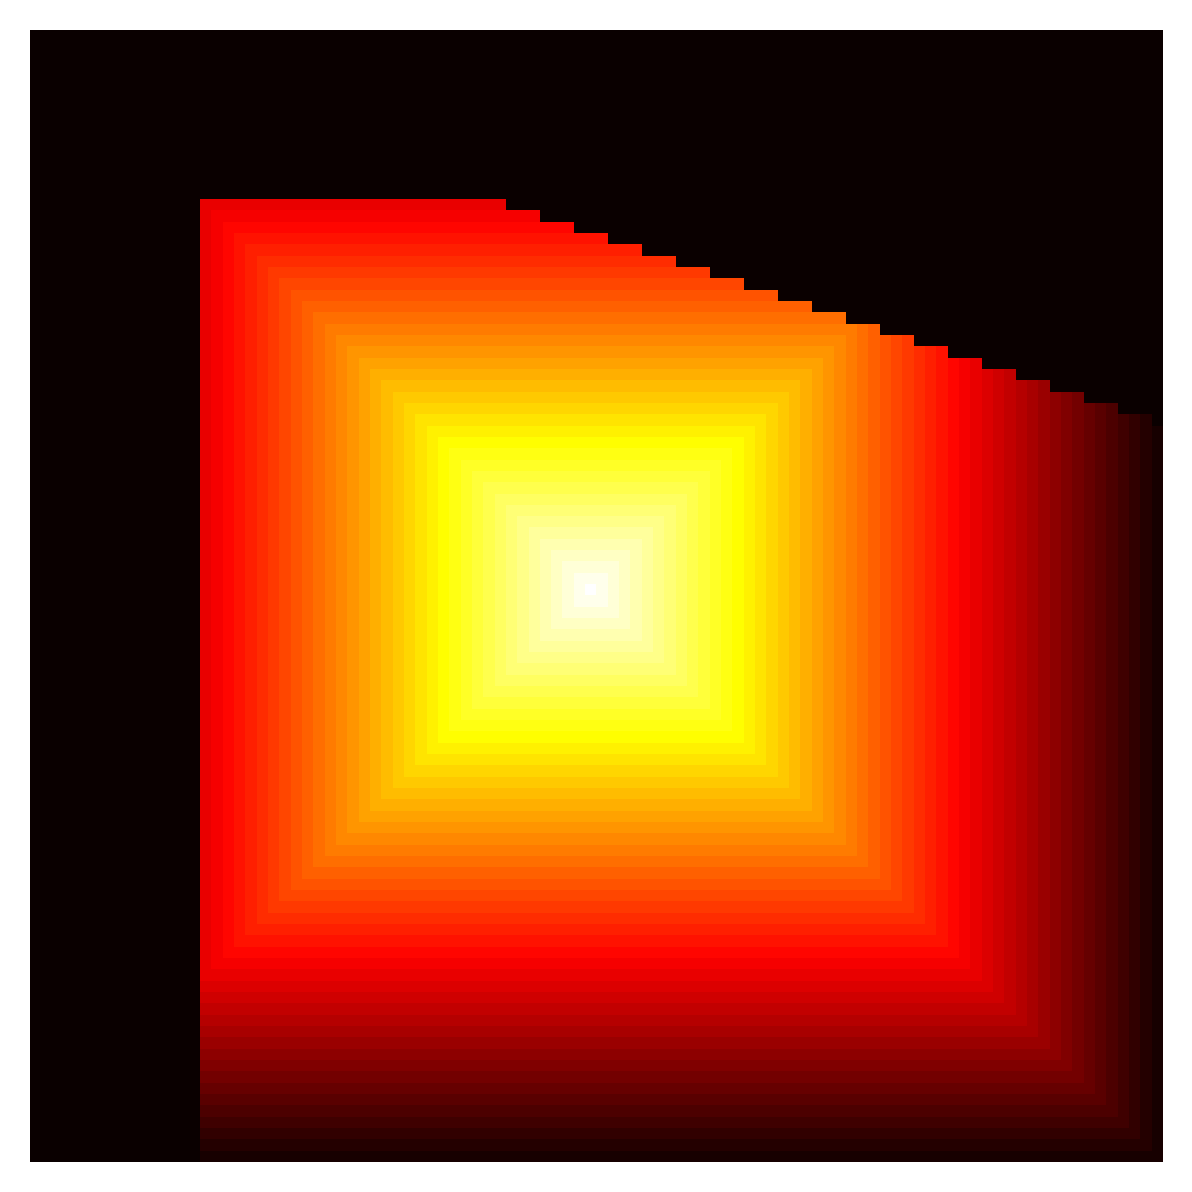

In [35]:
def m_show(m, size = 5, cmap = 'hot'):
    import matplotlib.pyplot as plt
    from numpy import array
    cmaps =  ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
    plt.figure(num = None, figsize=(size, size), dpi=300)
    plt.axis('off')
    plot = plt.imshow(array(m), cmap = cmap) #, interpolation='bicubic' )
    plt.show()
    plt.close()

def log_density_map(val, max_count):
    max_count +=1
    brightness = math.log(val) / math.log(max_count+1)
    gamma = 2.2
    brightness = math.pow(brightness, 1/gamma)
    return 256*brightness

def prep_m(m):
    max_v = np.max(m)
    shape = m.shape
    for i in range(shape[0]):
        for j in range(shape[1]):
            if m[i][j] > 0:
                m[i][j] = log_density_map(m[i][j], max_v)
    return m

def get_m(t):
    m = [[0]*big_n for i in range(big_n)]
    for c, v in t:
        m[c[0]-1][c[1]-1] = v
    return m

mat = get_m(terms)
m_show(mat)